In [1]:
import sys
import os
sys.path.append('/home/beinhaud/diplomka/mcs-source/evaluation_tools')

os.environ['TIME_STEP'] = "20"
os.environ['SIZE_MULTIPLIER'] = "0.1"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # use the second GPU

import nn_model.globals
from nn_model.type_variants import PathDefaultFields
from nn_model.dataset_loader import different_times_collate_fn
from evaluation_tools.response_analyzer import ResponseAnalyzer
from evaluation_tools.results_plotter import ResultsPlotter

In [2]:
# nn_model.globals.TIME_STEP = 10
print(nn_model.globals.SIZE_MULTIPLIER)

0.1


In [3]:
TRAIN_DIR = nn_model.globals.DEFAULT_PATHS[PathDefaultFields.TRAIN_DIR.value]
TEST_DIR = nn_model.globals.DEFAULT_PATHS[PathDefaultFields.TEST_DIR.value]

RESPONSES_DIR_BASE = "/home/beinhaud/diplomka/mcs-source/thesis_results/full_evaluation_results/"
MODEL_NAME = "model-10_sub-var-0_step-20_lr-7.5e-06_simple_optim-steps-1_neuron-layers-5-size-10-activation-leakytanh-res-False_hid-time-1_grad-clip-10000.0_optim-default_weight-init-default_synaptic-False-size-10-layers-1"

RESPONSES_DIR = RESPONSES_DIR_BASE + MODEL_NAME + "/"

In [4]:
num_data_workers = 8
workers_enabled = num_data_workers > 0
data_workers_kwargs = {
    "collate_fn": different_times_collate_fn,
    "num_workers": num_data_workers,  # number of workers which will supply data to GPU
    "pin_memory": workers_enabled,  # speed up data transfer to GPU
    "prefetch_factor": (
        num_data_workers // 2 if workers_enabled else None
    ),  # try to always have 4 samples ready for the GPU
    "persistent_workers": workers_enabled,  # keep the worker threads alive
}

In [5]:

response_analyzer = ResponseAnalyzer(TRAIN_DIR, TEST_DIR, responses_dir=RESPONSES_DIR, data_workers_kwargs=data_workers_kwargs)

# Create Histogram

In [6]:
response_analyzer.create_spikes_histogram_values(subset=10, process_test=False, include_input=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 10/5000 [00:06<55:03,  1.51it/s] 


({'V1_Exc_L4': array([2.1072e+05, 6.6668e+04, 3.4899e+04, 2.0437e+04, 1.2467e+04,
         8.4130e+03, 5.4750e+03, 3.9650e+03, 2.6500e+03, 1.9540e+03,
         1.4830e+03, 1.0520e+03, 8.7200e+02, 6.3300e+02, 5.2700e+02,
         4.4300e+02, 3.3000e+02, 2.8000e+02, 2.6200e+02, 1.9400e+02,
         1.8300e+02, 1.4900e+02, 1.3800e+02, 1.0600e+02, 9.1000e+01,
         7.5000e+01, 6.1000e+01, 6.2000e+01, 4.2000e+01, 6.0000e+01,
         3.5000e+01, 3.7000e+01, 2.5000e+01, 5.0000e+01], dtype=float32),
  'V1_Inh_L4': array([ 9859., 12374., 11298.,  9647.,  8097.,  6947.,  5767.,  4786.,
          4061.,  3334.,  2832.,  2350.,  1922.,  1619.,  1259.,  1040.,
           930.,   777.,   678.,   536.,   435.,   369.,   343.,   287.,
           251.,   182.,   186.,   174.,   120.,   132.,   106.,    89.,
            92.,   139.], dtype=float32),
  'V1_Exc_L23': array([1.08878e+05, 1.00595e+05, 6.79750e+04, 4.04680e+04, 2.32100e+04,
         1.30370e+04, 7.46200e+03, 4.44200e+03, 2.84500e+03, 1.8

In [7]:
response_analyzer.bin_edges

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

  0%|          | 0/90 [00:00<?, ?it/s]/home/beinhaud/miniconda3/envs/neural_simulator/lib/python3.8/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

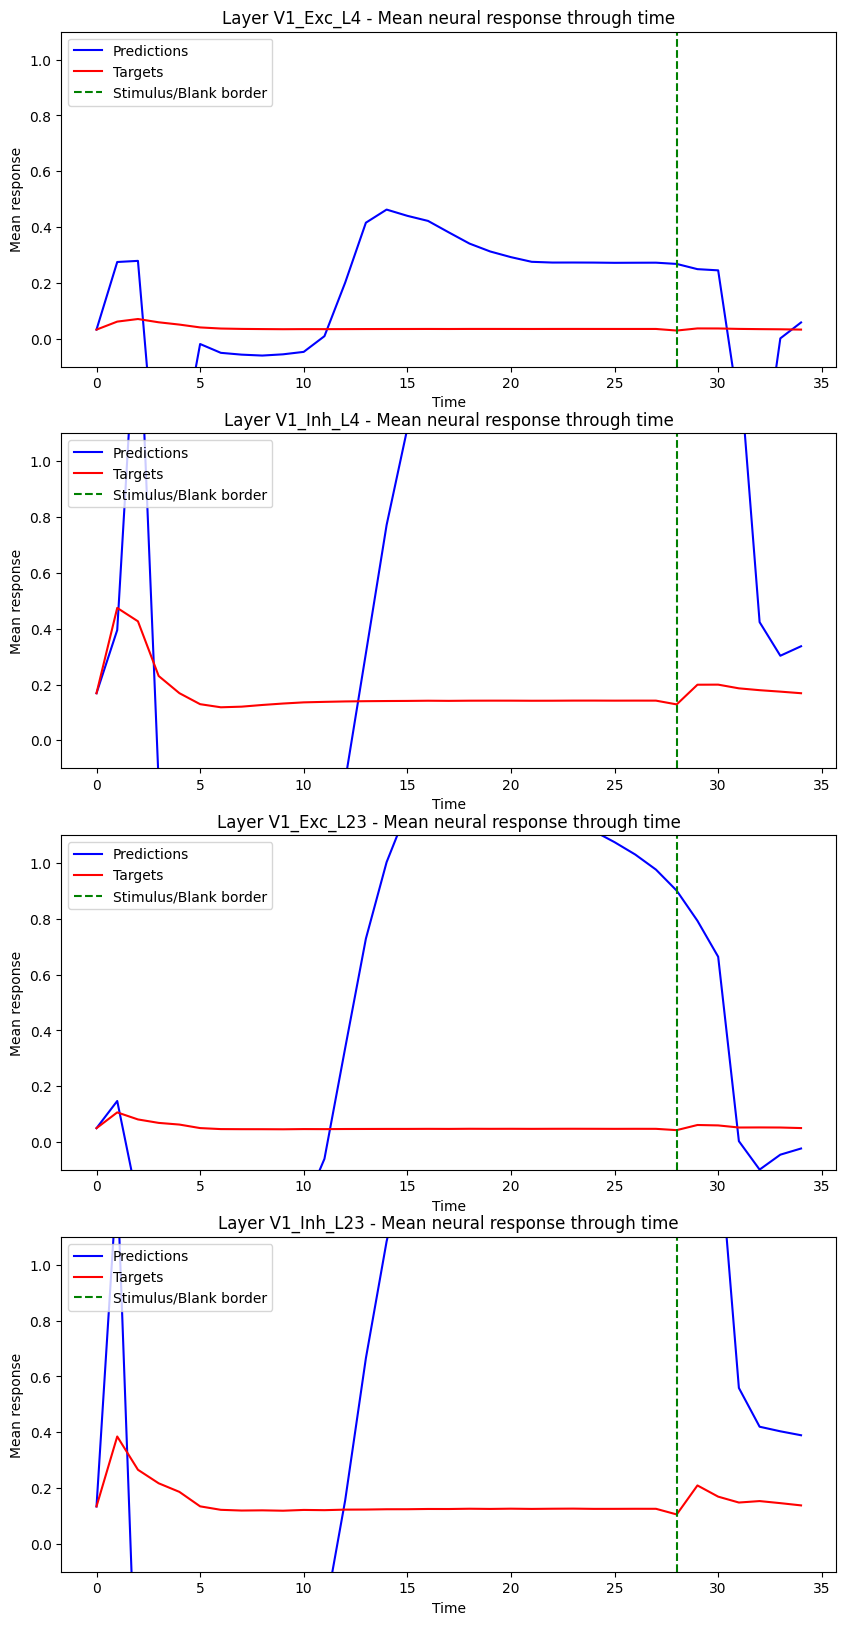

In [8]:
response_analyzer.get_mean_from_evaluated_data()
ResultsPlotter.plot_mean_layer_data(response_analyzer.mean_layer_responses, True, y_range=(-0.1, 1.1))